# Google Play and Apple iOS App Recommendations

### Scenario:

We're data analysts for an app development company in the United States. Over the last five years we have established a respectably sized customer based, but there are still opportunities to grow our customer base and increase revenue. We want to develop a new app that is a stand-alone free version that our customers will enjoy. To generate revenue, we may employ either in-app advertising, purchases, or subscriptions.

For reference the six most used app monetization strategies (for free apps) are:

* App advertising
* In-app purchases
* Subscriptions
* Selling merchandise
* Sponsorships
* Collecting and selling data

To minimize risks and overhead, our validation strategy for an app idea has three steps:

* Build a minimal Android version of the app, and add it to Google Play.
* If the app has a good response from users, we develop it further.
* If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Since we want to develop a new app for Google Play and iOS, the app profiles we pick need to be successful for both markets.

## Method
Before we do any visualization or making and recommendations, we first need to do the following:
* Load in the datasets
* Exploratory data analysis, some high level overview


## Recommendations
To make sound business decisions we need to perform a few tasks during analysis:

**What are the best apps/categories, how would we even define this idea**?

How to determine best categories for development....
May want to consider looking at editor's choice apps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
%matplotlib inline
import matplotlib.style as style
#pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [2]:
# Google play dataset
csv = pd.read_csv("google_apps_cleaned.csv")
csv.head()

# Apple iOS dataset
apple_csv = pd.read_csv("apple_apps_cleaned.csv")

As a brief introduction to correlation heatmaps, the following properties belong to correlation values:

Pearson's r (correlation) values lie between -1.00 and +1.00. When the positive correlation is perfect, the Pearson's r is equal to +1.00. When the negative correlation is perfect, the Pearson's r is equal to -1.00. **A value of 0.0 shows no correlation.**

A negative correlation indicates the opposite: If a value increases, the other value decreases. 

For further reading on the Pearson Correlation coefficient: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg

Values with a positive correlation (up to +1.0) are in green. Brown color indicates a negative (down to -1.0) correlation. At a first glance it seems that as apps that have higher `Maximum Installs` tend to have more `Ratings` (correlation is 0.54).

At a high level, this heatmap does not significantly help us identify the right metrics for what app recommendations.

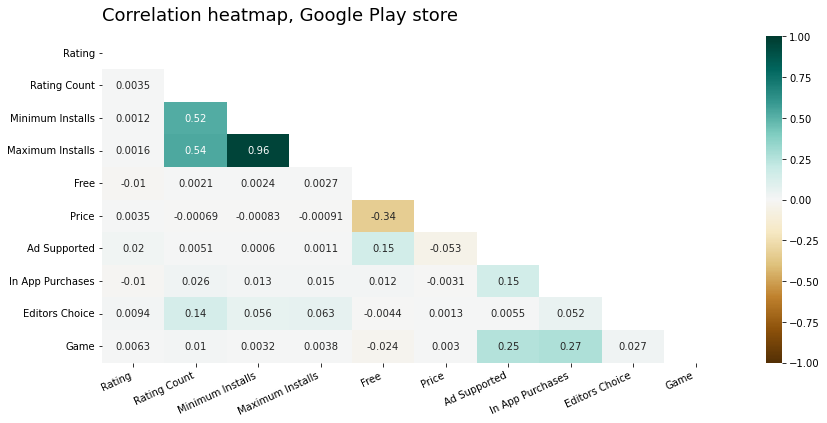

In [3]:
# Correlation matrix for google play
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(csv.corr(), dtype=bool))
heatmap = sns.heatmap(csv.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Correlation heatmap, Google Play store", fontdict={'fontsize':18}, pad=16, loc = "left")
plt.xticks(rotation = 25, ha = "right")
plt.show()

### Column information
The cleaned data sets do not contain missing data, and I removed several irrelevant columns that would not help our analysis.
A complete look at the data cleaning process for both google and apple (iOS) datasets can be found within the attached notebook file: `google_play_eda.ipynb` and `apple_ios_eda.ipynb`.

The following steps were taken for both datasets:

I removed any observations that included apps named in foreign languages, especially non-latin characters. To implement this task we can use the python method `.isascii()` in conjunction with a lambda function to iterate over all rows in a both the app name and developer columns. 

This method does have certain limitations. This method, `.isascii()` does not take into account English-language apps that contain emojis; it simply discards anything outside of traditional set of characters. Since, many foreign languages use the latin alphabet, and may not always have accent marks, observations without accent marks are not filtered out from this method. It also does not take into account foreign words or names.

In short, this method filters out some English-language apps, and does not filter out all non-English apps. However, for this analysis it will probably not affect the results drastically.

For further reading on the American Standard Code for Information Interchange: *https://en.wikipedia.org/wiki/ASCII*

As mentioned in the introduction, the fictional app developer is a US based company, and we only develop applications for English-speaking users. Attempting to analyzing non-English language apps is not in our interest, therefore we'll remove as many instances of such apps.

I filtered out any observations with 0 user installations (the number of times the app had been downloaded and installed) and 0 reviews. If the app had not been downloaded nor reviewed, it is not worth having unused applications that may skew the analysis. 

After data cleaning had ben performed the original datasets had been reduced to about 40% of their original sizes, but I would consider the current number of remaining observations to be more than enough for a representative dataset.

In [4]:
csv.info(memory_usage = "deep")
print("\n")

# Current dataset length (in percentage) after data cleaning
print("Remaining Google dataset length after data cleaning:",\
round(csv.shape[0] / 2312944 * 100, 2),"%") # 2,312,944 rows was the original length 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946795 entries, 0 to 946794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          946795 non-null  object 
 1   Category          946795 non-null  object 
 2   Rating            946795 non-null  float64
 3   Rating Count      946795 non-null  float64
 4   Installs          946795 non-null  object 
 5   Minimum Installs  946795 non-null  float64
 6   Maximum Installs  946795 non-null  int64  
 7   Free              946795 non-null  bool   
 8   Price             946795 non-null  float64
 9   Currency          946783 non-null  object 
 10  Developer Id      946795 non-null  object 
 11  Released          928637 non-null  object 
 12  Last Updated      946795 non-null  object 
 13  Content Rating    946795 non-null  object 
 14  Ad Supported      946795 non-null  bool   
 15  In App Purchases  946795 non-null  bool   
 16  Editors Choice    94

In [5]:
apple_csv.info(memory_usage = "deep")
print("\n")

# Current dataset length (in percentage) after data cleaning
print("Remaining Apple dataset length after data cleaning:",\
round(apple_csv.shape[0] / 1230376 * 100, 2),"%") # 1,230,376 rows was the original length 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510475 entries, 0 to 510474
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   App_Name             510475 non-null  object 
 1   Primary_Genre        510475 non-null  object 
 2   Content_Rating       510475 non-null  object 
 3   Released             510475 non-null  object 
 4   Updated              510475 non-null  object 
 5   Version              510475 non-null  object 
 6   Price                510475 non-null  float64
 7   Currency             510475 non-null  object 
 8   Free                 510475 non-null  bool   
 9   Developer            510475 non-null  object 
 10  Average_User_Rating  510475 non-null  float64
 11  Reviews              510475 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 285.2 MB


Remaining Apple dataset length after data cleaning: 41.49 %


As shown above, I have already performed a majority of data cleaning beforehand. There are no missing rows, and the complete dataframes are 40% of their original size. All columns are in the appropriate data type; memory usage is still high, but significantly more performance friendly than the original datasets (over 1gb memory usage).

Before we begin looking at this analyis too deeply, let's become familiar with the dataset. 
First, you can see that google and apple have completely different developers. What we'll see is the total number of times these particular developers show up in both dataframes (these are both just the top 10 highest).

*Subsplash Inc*"* is the only developer that we see appear twice in both top 10 lists. 41% of apps developed by the 10 developers from google play are education-related apps. Meanwhile, 46% of the apps from apple's top 10 developers are food & drink. It's important to consider that this does not automatically mean these are the most popular apps in general, and we shouldn't focus to heavily on this fact.

### App developers

In [6]:
top_10 = csv["Developer Id"].value_counts()[:10].index.to_list()
top_10_apple = apple_csv["Developer"].value_counts()[:10].index.to_list()

print("Top 10 Google Play store developers (by count)")
print(csv["Developer Id"].value_counts() [:10])
print("\n")
print("Top 10 Apple store developers (by count)")
print(apple_csv["Developer"].value_counts()[:10])

Top 10 Google Play store developers (by count)
Subsplash Inc             2296
+HOME by Ateam            1273
Games2Jolly                975
Virtuagym Professional     689
Education A19-Media        655
Education Media            603
Magzter Inc.               600
Education Galaxy Media     591
Kirill Sidorov             568
Education Nick Media       507
Name: Developer Id, dtype: int64


Top 10 Apple store developers (by count)
ChowNow                                     2865
MINDBODY, Incorporated                       535
Makeover Mania Story Games                   381
Tayga Games OOO                              379
Big Fish Games, Inc                          379
RAPID ACCELERATION INDIA PRIVATE LIMITED     368
Subsplash Inc                                352
Narvii Inc.                                  330
Magzter Inc.                                 320
GPSmyCity.com, Inc.                          317
Name: Developer, dtype: int64


In [7]:
# Category frequency for top 10 google app developers
print("Google developer top categories:")
print((csv[csv["Developer Id"].isin(top_10)]["Category"].value_counts(normalize = True) * 100)[:10])
print("\n")

# Category frequency for top 10 iOS app developers
print("Apple developer top categories:")
print((apple_csv[apple_csv["Developer"].isin(top_10_apple)]["Primary_Genre"].value_counts(normalize = True) * 100)[:10])

Google developer top categories:
Education            41.795135
Lifestyle            14.319973
Personalization      12.675574
Adventure            10.996917
Health & Fitness      8.062122
Books & Reference     6.566176
Art & Design          1.381752
News & Magazines      1.347493
Business              0.753683
Entertainment         0.548133
Name: Category, dtype: float64


Apple developer top categories:
Food & Drink              46.032766
Games                     18.069386
Health & Fitness           8.705429
Shopping                   6.039190
Travel                     5.268230
Social Networking          4.882750
Lifestyle                  4.866688
Education                  3.180212
Magazines & Newspapers     0.706714
Entertainment              0.610344
Name: Primary_Genre, dtype: float64


### App pricing
In the introduction it was stated that our fictional company develops free apps. Both app libraries are over 90% free to download, the reason this is true depends on how app developers generate revenue. Typically the strategy for revenue includes advertisements within the app itself, or in-app purchases (microtransactions).

iOS app store dataset does not state whether or not each app supports advertisements, but the google play dataset does show if an app supports ads. 56% of google play apps support some type of in-app advertisement, and later on this may be important to determine the type of revenue source of the app, depending on if particular categories are more inclined for advertisements or not.

Over 86% of google play apps do not support in-app purchases. I suspect that in-app purchases have more support for gaming-oriented apps compared to non-gaming apps. 

Below, I sampled apps that were priced over \$200. There are not too many apps that are this expensive, but it's interesting to see what applications are this expensive. Most of them don't have too many reviews and downloads.

In [8]:
# Free vs. paid apps frequency
print("Google apps free:")
print(csv["Free"].value_counts(normalize = True) * 100)
print("\n")

print("iOS apps free:")
print(apple_csv["Free"].value_counts(normalize=True) * 100)

Google apps free:
True     97.702459
False     2.297541
Name: Free, dtype: float64


iOS apps free:
True     90.887507
False     9.112493
Name: Free, dtype: float64


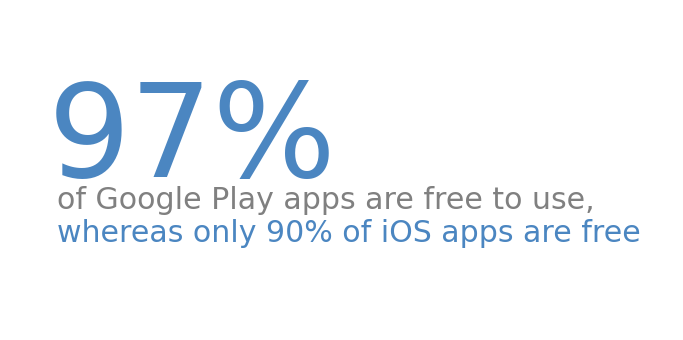

In [9]:
plt.subplots(figsize = (12, 6))
plt.text(0.06,.48,"97%", size = 130, color = "#4B86C1")
plt.text(0.075, 0.38, "of Google Play apps are free to use,", size = 30, color = "grey")
plt.text(0.075, 0.28,"whereas only 90% of iOS apps are free", size = 30, color = "#4B86C1")
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
# Google play
print("Google play ad support:")
csv["Ad Supported"].value_counts(normalize = True) * 100

Google play ad support:


True     56.019096
False    43.980904
Name: Ad Supported, dtype: float64

In [11]:
print("Google play in-app purchases (supported):")
csv["In App Purchases"].value_counts(normalize = True) * 100

Google play in-app purchases (supported):


False    86.431804
True     13.568196
Name: In App Purchases, dtype: float64

In [12]:
csv[csv["Price"] > 200].sample(5, random_state = 1)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
272996,Challenge Impossible Ball for you,Arcade,5.0,6.0,1+,1.0,4,False,399.99,USD,Ibrahim Tornado,2020-03-10,2020-06-02,Everyone,False,False,False,True
582619,Most expensive word game,Board,3.4,122.0,"5,000+",5000.0,5523,False,399.99,USD,Vadaaa,2020-05-11,2020-10-13,Everyone,True,False,False,True
560299,Correct Score Pros - BRONZE VIP,Sports,4.8,42.0,10+,10.0,41,False,214.99,USD,Bet Kings UK,2020-07-20,2021-05-24,Everyone,True,False,False,False
254757,Most Expensive Ball Jump Game,Arcade,5.0,10.0,10+,10.0,19,False,269.99,USD,AIZ Fun Games,2019-11-24,2019-11-24,Everyone,False,False,False,True
624436,[Legacy] Alarmy (Sleep If U Can),Lifestyle,4.1,11534.0,"10,000+",10000.0,45305,False,379.99,USD,Alarm Clock Alarmy,2012-12-02,2020-02-10,Everyone,False,False,False,False


In [13]:
apple_csv[apple_csv["Price"] > 200].sample(5, random_state = 1)

,App_Name,Primary_Genre,Content_Rating,Released,Updated,Version,Price,Currency,Free,Developer,Average_User_Rating,Reviews
15304,MMD Exams,Education,4+,2019-05-21 07:45:37+00:00,2021-08-17 20:04:20+00:00,4.0.0,349.99,USD,False,Angad C,5.00000,2
411412,TuneLab Piano Tuner,Music,4+,2009-12-03 08:00:00+00:00,2021-06-14 00:55:36+00:00,4.5.1,299.99,USD,False,Real-Time Specialties,4.47058,17
16225,Sales Client PRO,Business,4+,2014-11-25 11:27:40+00:00,2018-08-09 17:15:26+00:00,2018.8,249.99,USD,False,mrys SOFTWARE - Marco Rey y Sander,2.00000,1
174377,Archipad Classic,Productivity,4+,2011-09-01 07:00:00+00:00,2021-09-20 08:02:07+00:00,7.9.1,599.99,USD,False,Bigsool,5.00000,1
398270,Complete Dynamics,Medical,17+,2012-09-28 18:09:28+00:00,2021-07-31 11:51:53+00:00,21.10,219.99,USD,False,Eduard van Grinsven,4.25000,4


### Education vs. Educational, what's the difference?
We'll see to different app categories from google play: `Education` and `Educational`. To clear any confusion before analysis, education apps are focused on teaching users new skills such as a new language, math, and includes software used by teachers to organize student grades and information. Google play has another category (this category is not listed in Apple) called educational. Educational apps are simply mobile games developed for the purpose of learning. 

## Category overview

If you're an android user (google play) you'll find that you have a far greater selection of app categories to choose from compared to the iOS library, and Google has more apps to choose from. Google Play has roughly 2.3 million apps, whereas Apple only has about 1.2 million. However, we'll notice that both libraries share similarities when we compare how many apps belong to each category. Education, business, lifestyle, tools/utilities are typically the most frequent.

I believe one of the first things you'll see when you look at the frequency of Apple mobile apps is how many gaming apps are found in the iOS library. Over 20% of apple's library are just gaming, with the second highest app category belonging to education (less than 10%).

Overall, when we look at the average rating of all apps from both libraries there is not much of a difference. Google has a slightly higher average (4.09) compared to Apple (4.03). These average ratings are skewed by lower performing apps. Using the average when we have outliers is not always ideal, however in the case of determining the difference between apps based on the rating, the average provides more distinction. If we were to simply use the median rating, we would notice that just about every app has the same median rating.

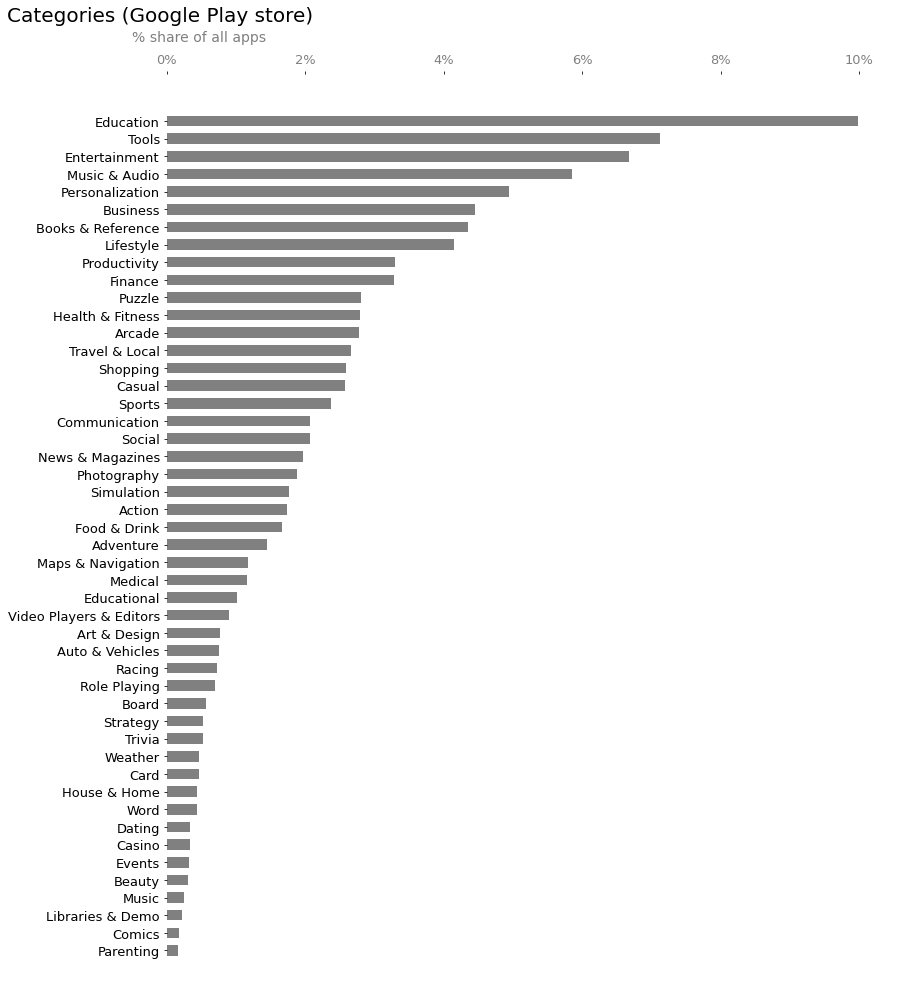

In [18]:
# Frequency of app categories
category_frequency = round(csv["Category"].value_counts(normalize = True) * 100, 2)

# Convert value counts series to pandas dataframe
category_frequency = pd.Series.to_frame(category_frequency).reset_index()


category_frequency = category_frequency.rename(columns = {"index": "App_Category", "Category":"Percentage"})
#4B86C1

fig, ax = plt.subplots(figsize = (13, 17))
plt.barh(category_frequency["App_Category"], category_frequency["Percentage"], color = "grey", height = 0.6)
plt.gca().invert_yaxis()
plt.title("Categories (Google Play store)", size = 20, loc = "left", x = -0.22, y = 1.05)
plt.text(-.5, -4.5,"% share of all apps", size = 14, color = "grey")

plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 13)
# Convert x ticks to percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

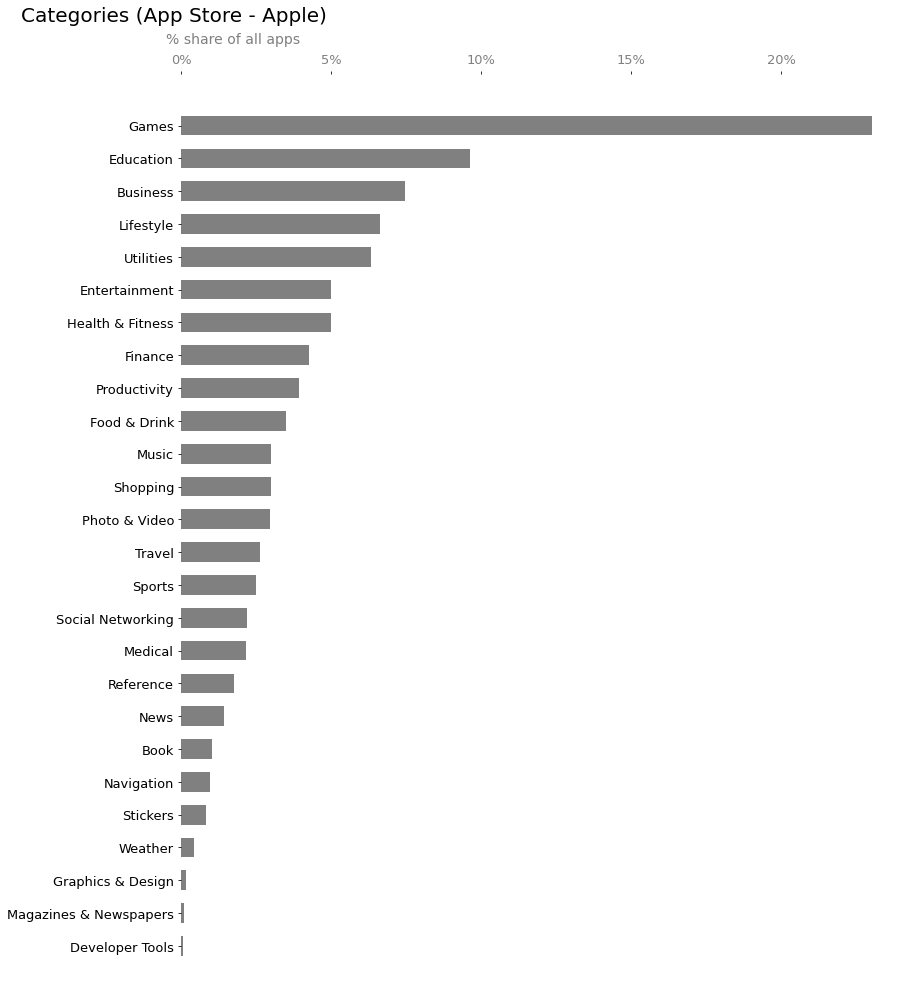

In [19]:
# Dataframe creation
apple_categories =  round(apple_csv["Primary_Genre"].value_counts(normalize = True) * 100, 2)
apple_categories = pd.Series.to_frame(apple_categories).reset_index()

apple_categories = apple_categories.rename(columns = {"index": "Category", "Primary_Genre":"Percentage"})




fig, ax = plt.subplots(figsize = (13, 17))
plt.barh(apple_categories["Category"], apple_categories["Percentage"], color = "grey", height = 0.6)
plt.gca().invert_yaxis()
plt.title("Categories (App Store - Apple)", size = 20, loc = "left", x = -0.22, y = 1.05)
plt.text(-.5, -2.5,"% share of all apps", size = 14, color = "grey")

plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 13)
# Convert x ticks to percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

### Category Ratings

Earlier it was noted that the median rating of apps in google play is 4.2, and apple iOS has a median rating of 4.52

With the average rating of google apps being 4.09, we can see that less than half (about 37%) of all categories have an above average rating, however Apple's library has more than 65% of its app categories being classified as above average.

There is a weak-positive (0.29) correlation between the total number of apps per category and the average rating. This means when the values in `Total_Count` increase, the values in `Average_Rating` tend to go up as well (and vice versa). The same concept is applied when values decrease, the other value will decrease also. 

For this pivot table I've changed the name of the `Maximum Installs` column to `Downloads (Median)`; they both represent the same value.

A negative correlation indicates the opposite: If a value increases, the other value decreases. We see this happen with the `Downloads (Median)` and `Average_Rating` columns (-0.4). If we see a higher value with the max number of downloads of a category, its average rating tends to decrease.


Text(0.4, 239000, 'Distribution of average ratings is skewed by poorly reviewed apps')

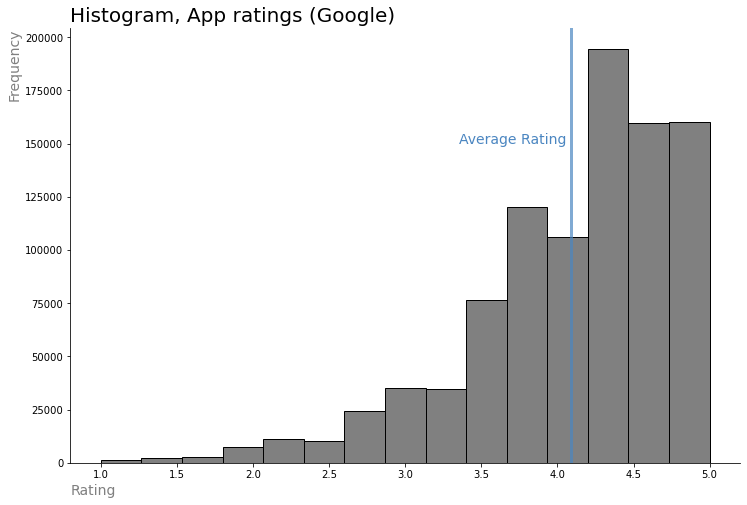

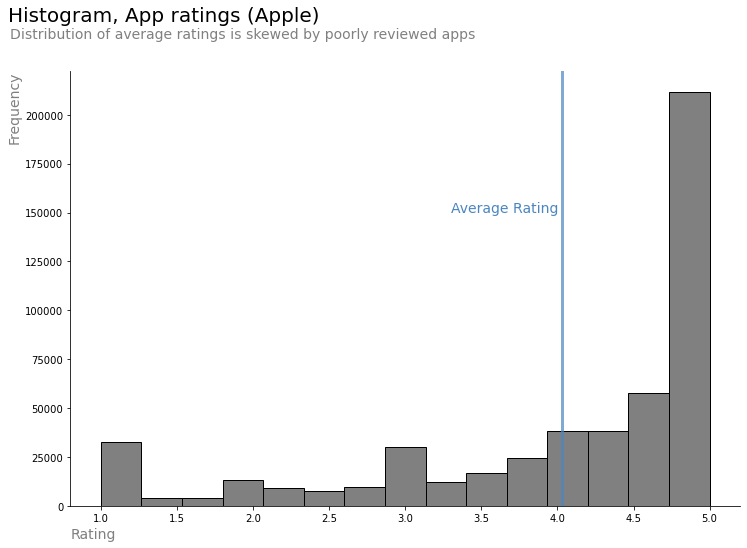

In [93]:
plt.figure(figsize = (12,8))
plt.hist(x = "Rating", data = csv, edgecolor = "black", bins = 15, color = "grey")
plt.gca().spines[["right","top"]].set_visible(False)
plt.xlabel("Rating", loc = "left", size = 14, color = "grey")
plt.title("Histogram, App ratings (Google)", size = 20, loc = "left")
plt.ylabel("Frequency", size = 14, color = "grey", loc = "top")
plt.axvline(csv["Rating"].mean(), color = "#4B86C1", alpha = 0.7, linewidth = 3)
plt.text(3.35, 150000, "Average Rating", size = 14, color = "#4B86C1")


plt.figure(figsize = (12,8))
plt.hist(x = "Average_User_Rating", data = apple_csv, edgecolor = "black", bins = 15, color = "grey")
plt.gca().spines[["right","top"]].set_visible(False)
plt.xlabel("Rating", loc = "left", size = 14, color = "grey")
plt.title("Histogram, App ratings (Apple)", size = 20, x = 0.14, y = 1.1)
plt.ylabel("Frequency", size = 14, color = "grey", loc = "top")
plt.axvline(apple_csv["Average_User_Rating"].mean(), color = "#4B86C1", alpha = 0.7, linewidth = 3)
plt.text(3.3, 150000, "Average Rating", size = 14, color = "#4B86C1")
plt.text(0.4,239000,"Distribution of average ratings is skewed by poorly reviewed apps", color = "grey", size = 14)

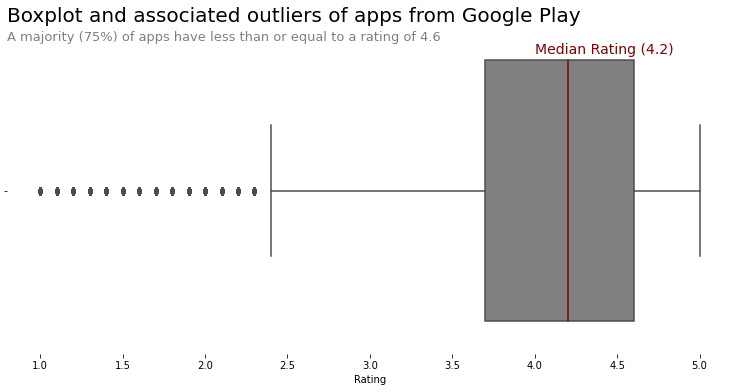

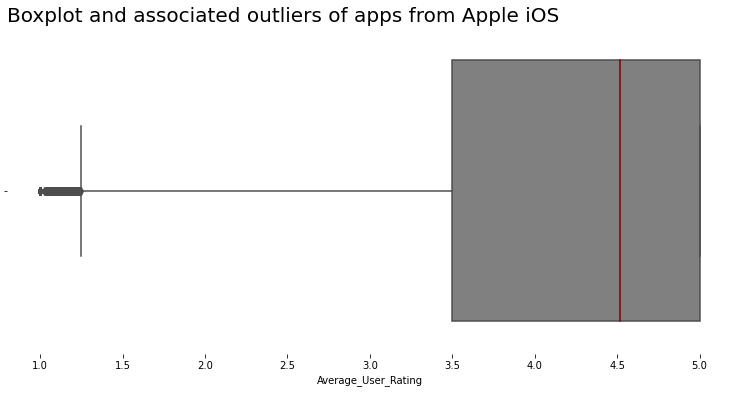

In [115]:
plt.figure(figsize = (13, 6))
sns.boxplot(data = csv, x = "Rating", color = "grey", medianprops=dict(color="maroon", alpha=1))
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.text(4,-0.42,"Median Rating (4.2)", color = "maroon", size = 14)
plt.text(0.8, -.46, "A majority (75%) of apps have less than or equal to a rating of 4.6", size = 13, color = "grey")
plt.title("Boxplot and associated outliers of apps from Google Play", size = 20, loc = "left")
plt.show()

plt.figure(figsize = (13, 6))
sns.boxplot(data = apple_csv, x = "Average_User_Rating", color = "grey", medianprops=dict(color="maroon", alpha=1))
plt.title("Boxplot and associated outliers of apps from Apple iOS", size = 20, loc = "left")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)

In [94]:
lower_quartile = csv["Rating"].quantile(0.25)
upper_quartile = csv["Rating"].quantile(0.75)

# Interquartile range
iqr = upper_quartile - lower_quartile
iqr


# Lower bound
lower_bound = lower_quartile - (iqr * 1.5)
lower_bound

# Assigns variables to values that exceed the upper and lower bounds

lower_outliers = (csv["Rating"] < lower_bound)

# Excludes price outliers from the dataframe
android = csv[~lower_outliers].copy()



lower_quartile = apple_csv["Average_User_Rating"].quantile(0.25)
upper_quartile = apple_csv["Average_User_Rating"].quantile(0.75)

# Interquartile range
iqr = upper_quartile - lower_quartile
iqr


# Lower bound
lower_bound = lower_quartile - (iqr * 1.5)
lower_bound

# Assigns variables to values that exceed the upper and lower bounds

lower_outliers = (apple_csv["Average_User_Rating"] < lower_bound)

# Excludes price outliers from the dataframe
ios = apple_csv[~lower_outliers].copy()

In [66]:
pd.options.display.float_format = '{:.2f}'.format

category_pivot_table = android.pivot_table\
(index = "Category", aggfunc = {"Category" : "count", "Rating" : "mean", "Maximum Installs": "median"})

category_pivot_table = category_pivot_table.rename\
(columns={"Category":"Total_Count", "Rating":"Average_Rating", "Maximum Installs":"Downloads (Median)"})
category_pivot_table = category_pivot_table.sort_values(by = "Average_Rating", ascending = False)

print("The average Google app rating is:", round(android["Rating"].mean(), 2), "out of 5")
category_pivot_table

The average Google app rating is: 4.15 out of 5


,Total_Count,Downloads (Median),Average_Rating
Category,,,
Events,2951,1263.00,4.37
Music & Audio,54817,4109.00,4.28
Arcade,26007,1665.00,4.28
Shopping,23846,2122.00,4.27
Personalization,46477,8719.00,4.27
Books & Reference,40593,6852.00,4.27
Word,4030,8237.00,4.26
Education,92641,3197.00,4.26
Puzzle,26408,5401.00,4.25


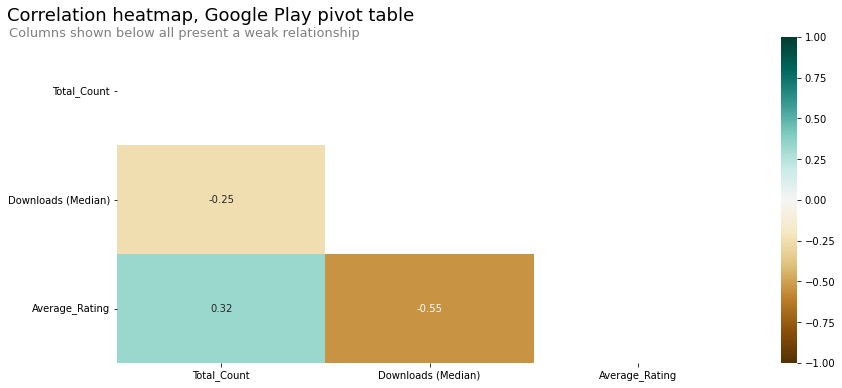

In [68]:
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(category_pivot_table.corr(), dtype=bool))
heatmap = sns.heatmap(category_pivot_table.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Correlation heatmap, Google Play pivot table", fontdict={'fontsize':18}, pad=16, x = 0.15)
plt.text(-0.52, 0, "Columns shown below all present a weak relationship", size = 13, color = "grey")
plt.yticks(rotation = 0)

plt.show()

The scatter plot below represents three different columns. Each single circle is a different app category belonging to the google play store. 
The y-axis shows the total number of apps that belong to each app category, and the x axis indicating the number of median downloads per category.

The majority of categories are clustered below a count of 60,000. With this in mind we could consider a category above 60,000 to be an outlier, or there are simply too many apps that already belong to these particular categories. 

There are few outliers for median downloads past 30,000. The number of installs associated with an app combined with the rating provides a better explanation for consumer preferences. Instead it might be better to keep any category that has median installs greater than the dataset median. 

In short, to narrow down our recommendations we may want to consider the following:

Google play categories should
* have a `Total_Count` below 60,000
* have a median number of `Maximum Installs` greater than or equal to the dataset median
* have an average rating of at least 4.0

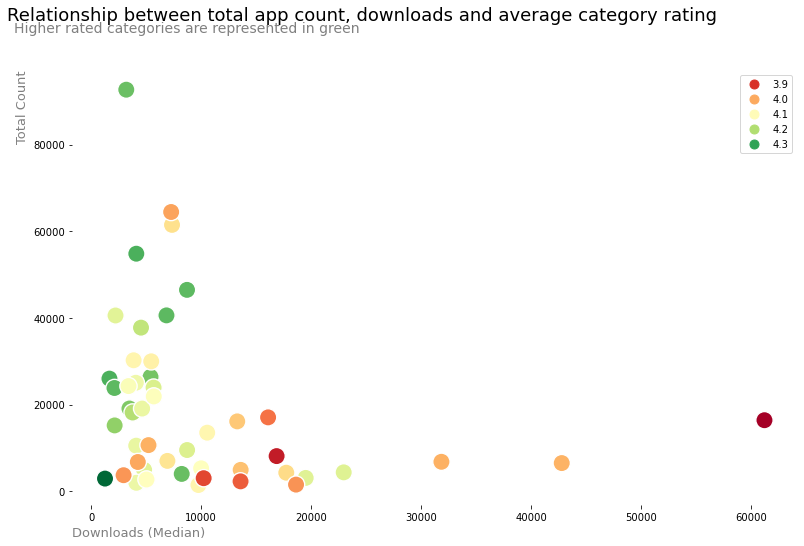

In [69]:
plt.figure(figsize=(13, 8))
#sns.scatterplot(x = "Downloads (Median)", y = "Total_Count", data = category_pivot_table, size = "Average_Rating", sizes = (50, 500))
sns.scatterplot(x = "Downloads (Median)", y = "Total_Count", data = category_pivot_table, hue = "Average_Rating", s = 300, palette = "RdYlGn")
plt.legend(markerscale = 1.5)
plt.title("Relationship between total app count, downloads and average category rating", size = 18, x = 0.4, y = 1.1)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.ylabel("Total Count", size = 13, loc = "top", color = "grey")
plt.xlabel("Downloads (Median)", size = 13, loc = "left", color = "grey")
plt.text(-7000, 106000, "Higher rated categories are represented in green", size = 14, color = "grey")
plt.show()

In [23]:
# category_list = category_pivot_table.index.tolist()
# category_list[:18] # Above average rated app categories




# colors = []

# for i in category_list[:18]:
#     colors.append("#4B86C1")
# else:
#     for i in category_list[18:]:
#         colors.append("grey")

# fig, ax = plt.subplots(figsize=(12, 15))
# plt.barh(category_pivot_table.index, category_pivot_table["Total_Count"], color = colors, height = 0.6)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
# plt.gca().invert_yaxis()
# plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
# ax.xaxis.tick_top()

# plt.title("App category total count (Google)", size = 20, x = 0, y = 1.08)
# plt.text(-18500, -6.2, "Sorted by average rating in descending order", size = 14)
# plt.text(8000, -4.8,"Number of apps in each category", size = 13, color = "grey")
# plt.text(60000, 5, "Google app categories\nabove average rating", size = 14, color = "#4B86C1")

# plt.xticks(size = 13, color = "grey")
# plt.yticks(size = 14)

# # Y tick label colors
# colors_yticks = ["#4B86C1"] * 18 # blue
# colors_yticks

# colors_yticks_2 = ["grey"] * 30 # grey
# colors_yticks_2

# # Set color to light blue
# labels = ax.get_yticklabels()

# for l, c in zip(labels, colors_yticks):
#     l.set_color(c)


# # Set color to grey
# more_labels = ax.get_yticklabels()[18:]

# for l, c in zip(more_labels, colors_yticks_2):
#     l.set_color(c)

# plt.text(4300, 0.2,"Average Rating: 4.29", size = 12, color = "grey")
# plt.text(40000, 17.3,"Average Rating: 4.1", size = 12, color = "grey")
# plt.text(64000, 32.2,"Average Rating: 4.0", size = 12, color = "grey")
# plt.text(4800, 47.2,"Average Rating: 3.8", size = 12, color = "grey")
# plt.show()



In [117]:
highest_rated = category_pivot_table[category_pivot_table["Average_Rating"] > android["Rating"].mean()].copy()
highest_rated = highest_rated.sort_values(by = "Downloads (Median)", ascending= False)
highest_rated.sort_values(by = "Average_Rating", ascending = False)

,Total_Count,Downloads (Median),Average_Rating
Category,,,
Events,2951,1263.00,4.37
Music & Audio,54817,4109.00,4.28
Arcade,26007,1665.00,4.28
Shopping,23846,2122.00,4.27
Personalization,46477,8719.00,4.27
Books & Reference,40593,6852.00,4.27
Word,4030,8237.00,4.26
Education,92641,3197.00,4.26
Puzzle,26408,5401.00,4.25


In [95]:
print("The average iOS app rating is:", round(ios["Average_User_Rating"].mean(), 2), "out of 5")

apple_pivot_table = ios.pivot_table\
(index = "Primary_Genre", aggfunc = {"Primary_Genre" : "count", "Average_User_Rating" : "mean"})

apple_pivot_table = apple_pivot_table.rename(columns={"Primary_Genre":"Total_Count", "Average_User_Rating":"Average_Rating"})
apple_pivot_table = apple_pivot_table.sort_values(by = "Average_Rating", ascending = False)
apple_pivot_table

The average iOS app rating is: 4.24 out of 5


,Average_Rating,Total_Count
Primary_Genre,,
Shopping,4.56,14734
Developer Tools,4.53,310
Food & Drink,4.48,16879
Graphics & Design,4.45,856
Lifestyle,4.39,32008
Stickers,4.39,3943
Health & Fitness,4.36,24091
Social Networking,4.36,10584
Business,4.34,35493


In [96]:
# iOS apps rated higher than dataset average
high_rated_apple = apple_pivot_table[apple_pivot_table["Average_Rating"] > ios["Average_User_Rating"].mean()]
high_rated_apple


,Average_Rating,Total_Count
Primary_Genre,,
Shopping,4.56,14734
Developer Tools,4.53,310
Food & Drink,4.48,16879
Graphics & Design,4.45,856
Lifestyle,4.39,32008
Stickers,4.39,3943
Health & Fitness,4.36,24091
Social Networking,4.36,10584
Business,4.34,35493


In [27]:
apple_cat_list = apple_pivot_table.index.tolist()

In [28]:
# # Apple pivot table
# # Category count sorted by rating
# colors = []

# for i in category_list[:17]:
#     colors.append("#4B86C1")
# else:
#     for i in category_list[17:]:
#         colors.append("grey")



# fig, ax = plt.subplots(figsize=(12, 15))
# plt.barh(apple_pivot_table.index, apple_pivot_table["Total_Count"], height = 0.6, color = colors)
# ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
# plt.title("App category total count (Apple)", size = 20, x = 0, y = 1.08)

# plt.text(-22700, -3.3, "Sorted by average rating in descending order", size = 14)
# plt.text(8000, -2.5,"Number of apps in each category", size = 13, color = "grey")
# plt.text(40000, 2, "iOS app categories\nabove average rating", size = 14, color = "#4B86C1")
# plt.gca().invert_yaxis()
# plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
# ax.xaxis.tick_top()

### Google Play app installs/downloads
Google play shows the number of times an app was installed/downloaded.
Apple does not contain this information.

The box plot below for Google apps demonstrates that the `Maximum Installs`(downloads) distribution is significantly skewed to the right by many apps. The truth is that the majority of mobile applications that we'll find on the play store have only equal to or less than about 32,000 downloads. I'll provide a table called `popular_apps` below that shows how each of the top downloaded apps for each category drastically skews the true average for each category. Some of these apps have hundreds of millions of downloads and even billions. 

If we attempt to figure out what app categories are most downloaded just by the mean (average) we'll end up with flawed results, because of the skewness. A more appropriate approach is to use the median installs. 

In [87]:
print(android["Maximum Installs"].describe().apply(lambda x: format(x, "f")))
print("\n")
print("75% of google apps have less than or equal to", android["Maximum Installs"].quantile(0.75),"installs")

count         922143.000000
mean          662806.636466
std         35832034.696076
min                1.000000
25%             1143.000000
50%             5143.000000
75%            31448.000000
max      12057627016.000000
Name: Maximum Installs, dtype: object


75% of google apps have less than or equal to 31448.0 installs


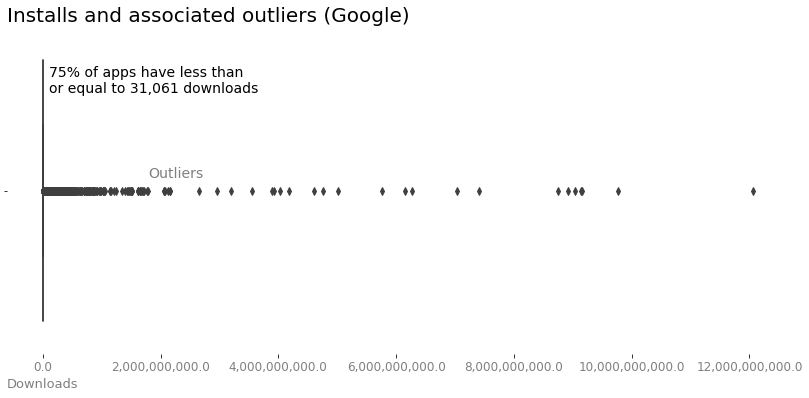

In [72]:
#$plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(data = android, x = "Maximum Installs")
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Installs and associated outliers (Google)", loc = "left", size = 20)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.text(1800000000,-0.04,"Outliers", size = 14, color = "grey")
plt.text(100000000,-0.3,"75% of apps have less than\nor equal to 31,061 downloads", size = 14)
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)
plt.xlabel("Downloads", loc = "left", size = 13, color = "grey")
plt.xticks(size = 12, color = "grey")
plt.show()

In [31]:
# bar_colors = []
# for i in range(9):
#     bar_colors.append("#4B86C1")
# for i in range(12):
#     bar_colors.append("grey")


# series = csv["Installs"]\
# .value_counts().iloc[[16, 15, 10, 9, 3, 4, 0, 2, 1, 6, 5, 8, 7, 11, 12, 13, 14, 17, 18, 19, 20]]
# #14
# ax = series.plot.bar(figsize = (14, 12), color = bar_colors)
# plt.title("Distribution, Google Play installs", x = 0.1, size = 20)
# plt.gca().spines[["right", "left", "top"]].set_visible(False)
# plt.xticks(rotation = 35, ha = "right", color = "grey")
# #plt.yticks(color = "grey")
# plt.xlabel("Installs", color = "grey", size = 14, loc = "left")
# plt.ylabel("Frequency", color = "grey", size = 14, loc = "top")
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

# colors = ["#4B86C1"] * 9

# labels = ax.get_xticklabels()[:9]

# for l, c in zip(labels, colors):
#     l.set_color(c)


# plt.text(8,200000,"75 % of google apps have at least", size = 14)

# plt.show()

### Apps with over 1 billion downloads
Google Play Services is the only app on the google play store that has over 10 billion downloads. This app is installed by default on android devices, and is a critical component that enables google to authenticate services to the user. If this app is uninstalled, other apps may not work.

Google apps that have the most downloads include WhatsApp, YouTube, Google Drive, Gmail, Facebook, Netflix, TikTok, Candy Crush Saga, Instagram, Skype, Snapchat, and a host of other well-known applications.

In [73]:
android[android["Installs"] == "10,000,000,000+"]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
884457,Google Play services,Tools,4.20,35128398.00,"10,000,000,000+",10000000000.00,12057627016,True,0.00,USD,Google LLC,2012-05-24,2021-06-10,Everyone,False,False,False,False


In [74]:
# List of apps with over 5 billion downloads
android[android["Installs"] =="5,000,000,000+"]["App Name"].unique().tolist()

['Google TV (previously Play Movies & TV)',
 'WhatsApp Messenger',
 'YouTube',
 'Google Drive',
 'Hangouts',
 'Google Chrome: Fast & Secure',
 'Google Text-to-Speech',
 'Google Maps - Navigate & Explore',
 'Google',
 'Google Photos',
 'Android Accessibility Suite',
 'Gmail']

In [75]:
# List of apps with over 1 billion downloads
android[android["Installs"] =="1,000,000,000+"]["App Name"].unique().tolist()

['Samsung Email',
 'Netflix',
 'Samsung Gallery',
 'TikTok',
 'Dropbox: Cloud Storage, Photo Backup, File Manager',
 'Samsung Health',
 'Google Calendar',
 'Candy Crush Saga',
 'Instagram',
 'Samsung Experience Service',
 'Skype - free IM & video calls',
 'Briefing',
 'Google Play Books - Ebooks, Audiobooks, and Comics',
 'Google Street View',
 'ANT Radio Service',
 'SHAREit - Transfer & Share',
 'Carrier Services',
 'Google Play Services for AR',
 'Subway Surfers',
 'Spotify: Listen to podcasts & find music you love',
 'ANT+ Plugins Service',
 'Samsung My Files',
 'Currents',
 'Google News - Top world & local news headlines',
 'Samsung Calculator',
 'Samsung Security Policy Update',
 'Samsung Voice Recorder',
 'Samsung Push Service',
 'Microsoft PowerPoint: Slideshows and Presentations',
 'Gboard - the Google Keyboard',
 'Android System WebView',
 'Samsung One UI Home',
 'Microsoft Excel: View, Edit, & Create Spreadsheets',
 'Google Translate',
 'Google Play Games',
 'Snapchat',
 'Sam

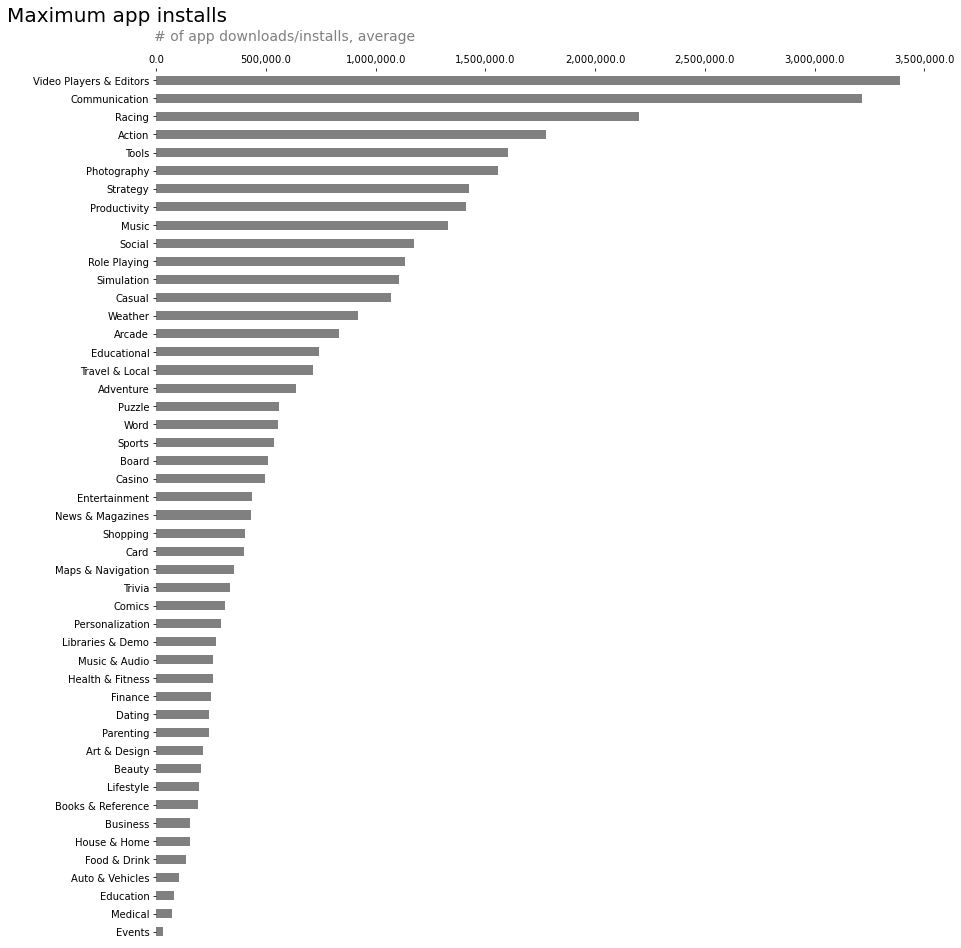

In [78]:
categories_grouped = android.groupby("Category")

# Categories with highest minimum installs, average
fig, ax = plt.subplots(figsize = (14, 16))
categories_grouped["Maximum Installs"].mean().sort_values(ascending = True).plot.barh(color = "grey")
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Maximum app installs", size = 20, x = -0.05, y= 1.05)
plt.ylabel("")
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
ax.xaxis.tick_top()
plt.text(-10000, 49.2, "# of app downloads/installs, average", size = 14, color = "grey")


plt.show()

Education:
- education apps are the most numerous
- above average rating
- on average, one of the lowest downloaded categories

### Most downloaded google apps per category

In [79]:
sort_installs = android.groupby(["App Name", "Category"], as_index = False)["Maximum Installs"].max().copy()
sort_installs = sort_installs.sort_values(by = "Maximum Installs", ascending = False)
popular_apps = sort_installs.drop_duplicates(subset = "Category", keep = "first")
popular_apps

,App Name,Category,Maximum Installs
329925,Google Play services,Tools,12057627016
888315,YouTube,Video Players & Editors,9766230924
329908,Google Maps - Navigate & Explore,Travel & Local,9141671889
329885,Google Chrome: Fast & Secure,Communication,8925640788
329893,Google Drive,Productivity,7028265259
329918,Google Photos,Photography,5754179589
329923,Google Play Games,Entertainment,4605543029
191007,Currents,Social,3929716163
329921,"Google Play Books - Ebooks, Audiobooks, and Co...",Books & Reference,3202676731
329913,Google News - Top world & local news headlines,News & Magazines,2961820154


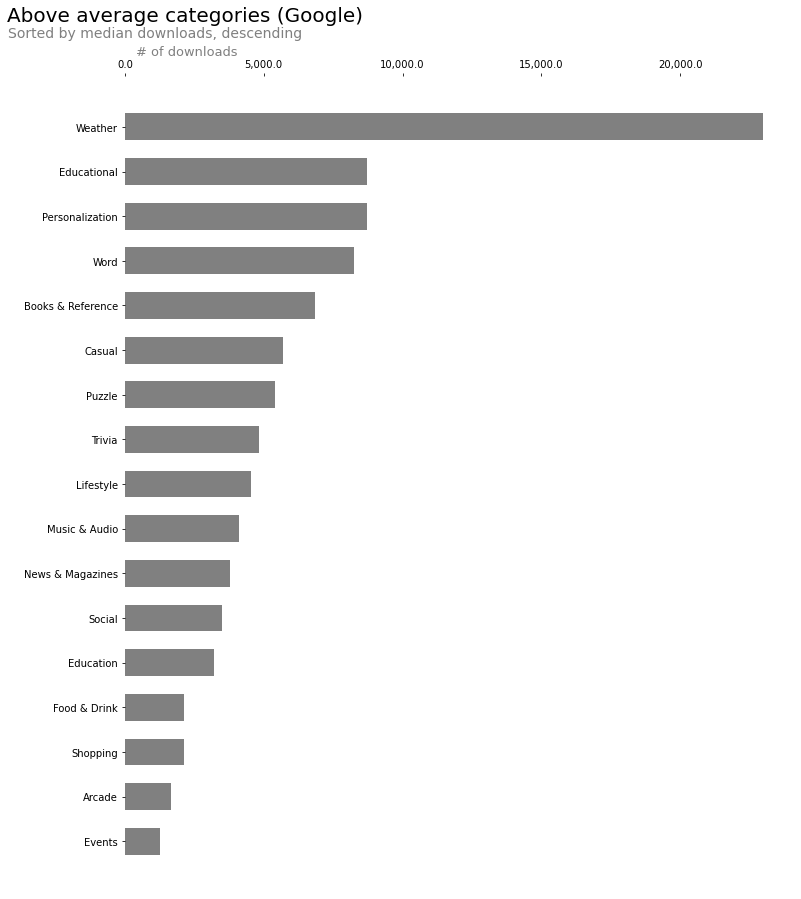

In [137]:
# Above average rated google apps
fig, ax = plt.subplots(figsize=(12, 15))
plt.barh(highest_rated.index, highest_rated["Downloads (Median)"], height = 0.6, color = "grey")
plt.title("Above average categories (Google)", size = 20, x =0.09, y = 1.06)
plt.text(-4200,-2.0,"Sorted by median downloads, descending", color = "grey", size = 14)
plt.text(400, -1.6, "# of downloads", color = "grey", size = 13)
plt.gca().invert_yaxis()
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

### Gaming

When we first looked at the content of app categories for both libraries it appeared the apple's library contained far more gaming apps compared to its other categories (education was the second highest at less than 10%). At first it seems like google play has more variety, and more utilitarian app categories. However, google play has divided the gaming categories into multiple different types such as "Puzzle", "Arcade", "Casual", "Simulation", "Action" and so on. Apple merely categories all games into one type: "Games".

The actual difference between both libraries' gaming content is less than 5%. Apple **does** have more more game-centric apps, but it's a small difference.

The average rating between game categories and non-game categories is insignificant.

Apple's "Games" category average and median rating falls below the average and median of the entire dataset.

In [97]:
def ios_is_game(row):
    if row != "Games":
        return False
    else:
        return True

ios["Game"] = ios["Primary_Genre"].apply(ios_is_game)

In [98]:
print("Gaming app frequency (google):")
print(android["Game"].value_counts(normalize = True) * 100)
print("\n")
print("Gaming app frequency (apple):")
print(ios["Game"].value_counts(normalize = True) * 100)

Gaming app frequency (google):
False   81.34
True    18.66
Name: Game, dtype: float64


Gaming app frequency (apple):
False   76.72
True    23.28
Name: Game, dtype: float64


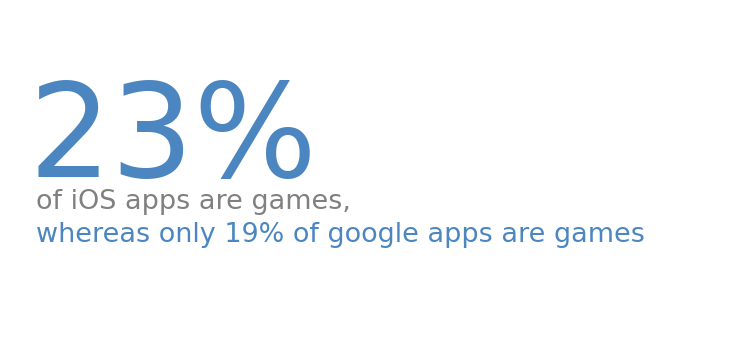

In [40]:
plt.subplots(figsize = (13, 6))
plt.text(0.03,.48,"23%", size = 130, color = "#4B86C1")
plt.text(0.04, 0.38, "of iOS apps are games,", size = 27, color = "grey")
plt.text(0.04, 0.28,"whereas only 19% of google apps are games", size = 27, color = "#4B86C1")
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [99]:

print("Google Ratings:", android.groupby("Game")["Rating"].mean())
print("")
print("Apple Ratings:", ios.groupby("Game")["Average_User_Rating"].mean())

Google Ratings: Game
False   4.15
True    4.13
Name: Rating, dtype: float64

Apple Ratings: Game
False   4.26
True    4.16
Name: Average_User_Rating, dtype: float64


### Editor's Choice
On the google play store, if an app is *Editor's Choice* it is considered on of the best Android apps of all time, and recommended by google.

In [83]:
android["Editors Choice"].value_counts(normalize=True) * 100

False   99.93
True     0.07
Name: Editors Choice, dtype: float64

### Potential filtering (work in progress)

In [84]:
android[android["Editors Choice"] == True]["Game"].value_counts(normalize=True) * 100

True    57.36
False   42.64
Name: Game, dtype: float64

In [85]:
android["Maximum Installs"].median()

5143.0

In [86]:
android["Maximum Installs"].quantile(0.75)

31448.0

In [88]:
# Categories under 60,000 total count
filter = category_pivot_table[(category_pivot_table["Total_Count"] <=60000)\

# Median downloads less than or equal to 20,000
& (category_pivot_table["Downloads (Median)"] >= csv["Maximum Installs"].median())\

# Average rating greater than or equal to 4.0
& (category_pivot_table["Average_Rating"] >= 4)]

print("Removed", csv["Category"].nunique() - len(filter.index),"categories from original dataset")

Removed 28 categories from original dataset


In [91]:
filter.index.to_list()

['Personalization',
 'Books & Reference',
 'Word',
 'Puzzle',
 'Casual',
 'Educational',
 'Weather',
 'Casino',
 'Sports',
 'Board',
 'Adventure',
 'Parenting',
 'Finance',
 'Art & Design',
 'Card',
 'Action',
 'Strategy',
 'Role Playing',
 'Racing',
 'Maps & Navigation']

In [163]:
high_rated_apple = high_rated_apple.index.to_list()

In [100]:
# Google categories that match criteria for potential recommendations
google_list = filter.index.to_list() # Create list from the filtered categories index

# List of categories to remove that are not shared in apple's highest rated categories
to_remove = [
    "Action", 
    "Adventure", 
    "Board", 
    "Card", 
    "Casino", 
    "Casual", 
    "Educational", 
    "Puzzle", 
    "Word",
    "Strategy", 
    "Role Playing", 
    "Racing"
    ]

# Iterate over google_list to append to new_list

# Empty list to append final items to
new_list_google = []

# All items in google list
for item in google_list:
    if item not in to_remove: # if the item does not belong to the to_remove list
        new_list_google.append(item) # add to the new_list_google, will end up with 5 remaining items

print("Final Google categories:")
print(new_list_google)
print("")
print("Apple top rated categories:")
apple_list = high_rated_apple.index.tolist()
print(apple_list)
print("")


Final Google categories:
['Personalization', 'Books & Reference', 'Weather', 'Sports', 'Parenting', 'Finance', 'Art & Design', 'Maps & Navigation']

Apple top rated categories:
['Shopping', 'Developer Tools', 'Food & Drink', 'Graphics & Design', 'Lifestyle', 'Stickers', 'Health & Fitness', 'Social Networking', 'Business', 'Magazines & Newspapers', 'Book', 'Music', 'Medical', 'Sports', 'News', 'Reference']



In [150]:
android_final = android[android["Category"].isin(new_list_google)].set_index("Released").copy()

In [164]:
ios_final = ios[ios["Primary_Genre"].isin(high_rated_apple)].set_index("Released").copy()

In [168]:
ios_final.index = pd.to_datetime(ios_final.index)

In [169]:
ios_final.index

DatetimeIndex(['2015-08-31 19:31:32+00:00', '2017-04-19 13:24:42+00:00',
               '2015-05-12 07:45:22+00:00', '2012-04-02 11:01:26+00:00',
               '2015-12-19 00:41:11+00:00', '2015-08-21 01:26:22+00:00',
               '2015-03-25 00:06:27+00:00', '2013-12-28 21:43:39+00:00',
               '2020-10-23 07:00:00+00:00', '2012-03-09 21:10:09+00:00',
               ...
               '2021-02-15 08:00:00+00:00', '2020-07-15 07:00:00+00:00',
               '2020-03-26 07:00:00+00:00', '2019-12-29 08:00:00+00:00',
               '2021-06-17 07:00:00+00:00', '2018-01-04 16:29:42+00:00',
               '2017-01-24 18:24:22+00:00', '2020-06-21 07:00:00+00:00',
               '2018-11-17 15:21:24+00:00', '2020-07-07 07:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Released', length=196497, freq=None)

In [151]:
android_final.index = pd.to_datetime(android_final.index)

android_final.index

DatetimeIndex(['2019-09-22', '2013-12-15', '2020-05-30', '2015-06-19',
               '2013-04-27', '2017-06-15', '2012-04-14', '2020-11-08',
               '2015-07-13', '2014-10-31',
               ...
               '2017-08-10', '2017-08-11', '2020-12-20', '2013-10-15',
               '2017-08-01', '2019-07-22', '2021-03-01', '2018-05-21',
               '2016-04-27', '2020-12-28'],
              dtype='datetime64[ns]', name='Released', length=162529, freq=None)

In [152]:
android_final["Last Updated"] = pd.to_datetime(android_final["Last Updated"])

In [153]:

android_final["Last Updated"].max()

Timestamp('2021-06-16 00:00:00')

From the author's page, the data was scraped in 2021. Checking the latest value for `Last Updated` indicates the data may have been scraped in June. 
The year for 2021 is incomplete.

<AxesSubplot:xlabel='Released'>

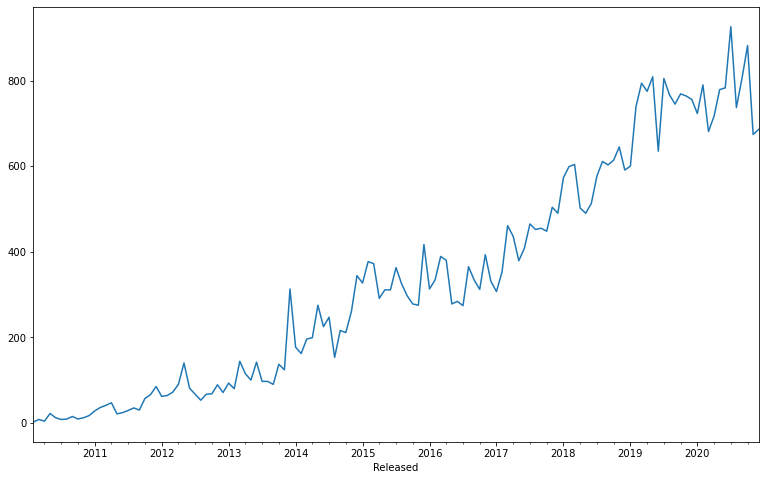

In [154]:
plt.figure(figsize = (13, 8))
android_final[android_final["Category"] == "Personalization"].resample("M").size().loc[:"2020-12-31"].plot()
# google_final[google_final["Category"] == "Books & Reference"].resample("M").count()["Category"].plot()
# google_final[google_final["Category"] == "Weather"].resample("M").count()["Category"].plot()
# google_final[google_final["Category"] == "Sports"].resample("M").count()["Category"].plot()
# google_final[google_final["Category"] == "Finance"].resample("M").count()["Category"].plot()


<AxesSubplot:xlabel='Released'>

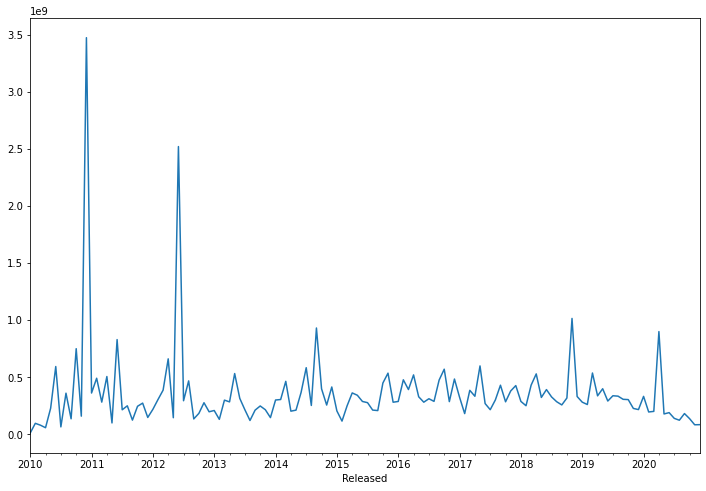

In [181]:
plt.figure(figsize = (12,8))
android_final["Maximum Installs"].resample("M").sum().loc[:"2020-12-31"].plot()

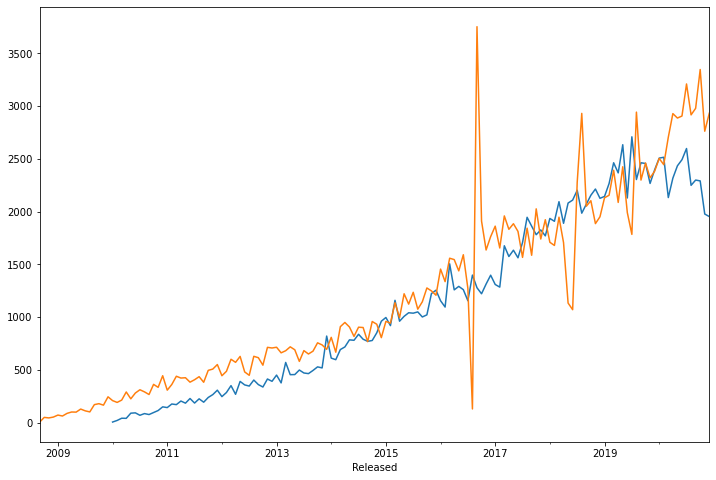

In [177]:
plt.figure(figsize = (12,8))
android_final["Category"].resample("M").size().loc[:"2020-12-31"].plot()
ios_final["Primary_Genre"].resample("M").size().loc[:"2020-12-31"].plot()
plt.show()


<AxesSubplot:xlabel='Released'>

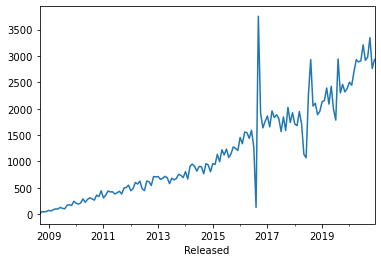

In [174]:
ios_final["Primary_Genre"].resample("M").size().loc[:"2020-12-31"].plot()

<AxesSubplot:xlabel='Released'>

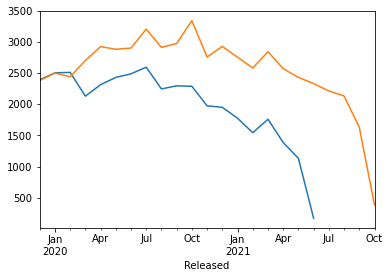

In [182]:

android_final["Category"].resample("M").size().loc["2019-12-31":].plot()
ios_final["Primary_Genre"].resample("M").size().loc["2019-12-31":].plot()


<AxesSubplot:xlabel='Released'>

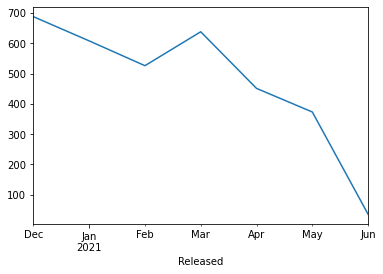

In [141]:
android_final[android_final["Category"] == "Personalization"].resample("M").size().loc["2020-12-31":].plot()
ios_final["Primary_Genre"].resample("M").size().loc["2020-12-31":].plot()

In [145]:
new_df = pd.read_csv("google_apps_cleaned.csv", parse_dates= True, index_col= "Released")

In [57]:
#new_df

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
Released,,,,,,,,,,,,,,,,,
2020-05-21,Ampere Battery Info,Tools,4.40,64.00,"5,000+",5000.00,7662,True,0.00,USD,Webserveis,2021-05-06,Everyone,True,False,False,False
2018-09-10,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.00,5.00,10+,10.00,19,True,0.00,USD,Climate Smart Tech2,2018-10-13,Everyone,True,False,False,False
2019-09-23,unlimited 4G data prank free app,Libraries & Demo,4.50,12.00,"1,000+",1000.00,2567,True,0.00,USD,android developer779,2019-09-27,Everyone,True,False,False,False
2019-06-21,The Everyday Calendar,Lifestyle,2.00,39.00,500+,500.00,702,True,0.00,USD,Mozaix LLC,2019-06-21,Everyone,False,False,False,False
2019-09-22,Neon 3d Iron Tech Keyboard Theme,Personalization,4.70,820.00,"50,000+",50000.00,62433,True,0.00,USD,Free 2021 Themes for Emoji keyboard,2020-10-07,Everyone,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-10-02,Murottal Muh Tha al Junayd Offline,Entertainment,4.40,23.00,"1,000+",1000.00,1783,True,0.00,USD,Bunda Nino,2018-04-15,Everyone,True,False,False,False
2020-06-10,Driving Day,Entertainment,2.80,1002.00,"500,000+",500000.00,590469,True,0.00,USD,maan1patel0,2020-06-10,Everyone,True,False,False,False
2015-10-29,Hopeless 2: Cave Escape,Action,4.30,103466.00,"5,000,000+",5000000.00,7274660,True,0.00,USD,Upopa Games,2017-03-06,Teen,True,True,False,True


<AxesSubplot:xlabel='Released'>

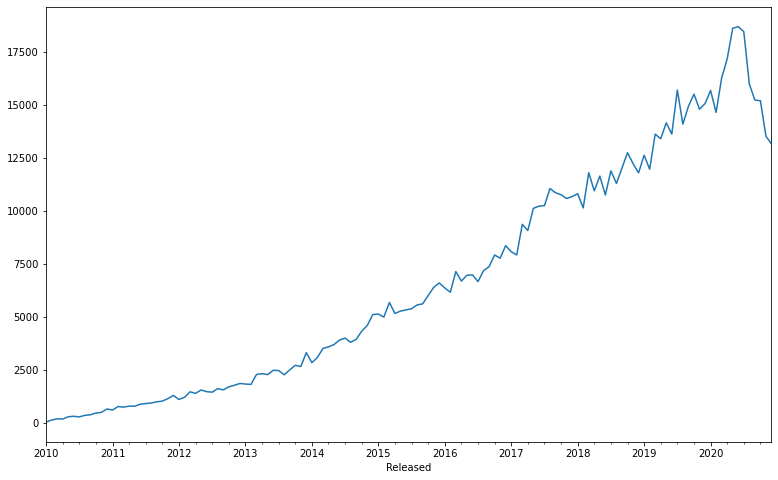

In [149]:
plt.figure(figsize = (13, 8))
new_df["Category"].resample("M").size().loc[:"2020-12-31"].plot()


### Data Exploration